In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('bhp.csv')

In [3]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

## <span style="color:red"> Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles</span>

In [5]:
min_thresh, max_thresh = df['price_per_sqft'].quantile([0.001, 0.999])

In [6]:
no_outlier_percentile_df = df[(df['price_per_sqft'] >= min_thresh) & (df['price_per_sqft'] <= max_thresh)]

In [7]:
no_outlier_percentile_df['price_per_sqft'].describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

### <span style = "color: red">Use 4 standard deviation to remove outliers </span>

In [8]:
std = no_outlier_percentile_df['price_per_sqft'].std()
mean = no_outlier_percentile_df['price_per_sqft'].mean()
lower_bound = mean - 4 * std
higher_bound = mean + 4 * std

In [9]:
no_outlier_std = no_outlier_percentile_df[(no_outlier_percentile_df['price_per_sqft'] >= lower_bound) & (no_outlier_percentile_df['price_per_sqft'] <= higher_bound)]

In [19]:
no_outlier_std['price_per_sqft'].describe()

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

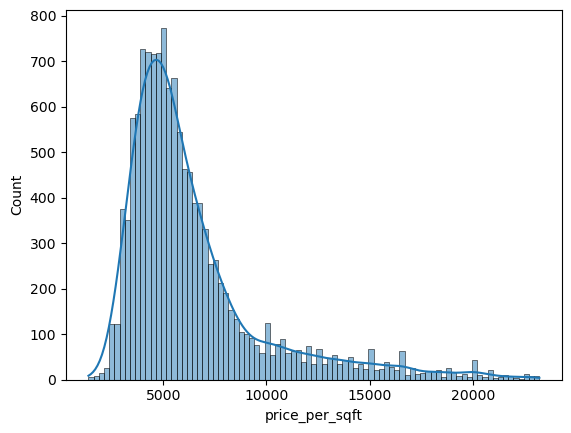

In [11]:
sns.histplot(no_outlier_std['price_per_sqft'], kde=True)

### <span style="color:red">Use zscore of 4 to remove outliers</span>

In [14]:
no_outlier_percentile_df['z_score'] = (no_outlier_percentile_df['price_per_sqft'] - no_outlier_percentile_df['price_per_sqft'].mean()) / no_outlier_percentile_df['price_per_sqft'].std()

C:\Users\User\AppData\Local\Temp\ipykernel_13960\3832821304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outlier_percentile_df['z_score'] = (no_outlier_percentile_df['price_per_sqft'] - no_outlier_percentile_df['price_per_sqft'].mean()) / no_outlier_percentile_df['price_per_sqft'].std()


In [17]:
no_outlier_zscore = no_outlier_percentile_df[(no_outlier_percentile_df['z_score'] >= -4) & (no_outlier_percentile_df['z_score'] <= 4)]

<Axes: xlabel='price_per_sqft', ylabel='Count'>

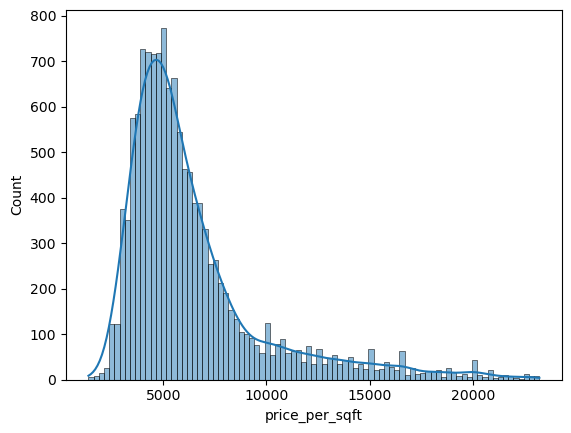

In [18]:
sns.histplot(no_outlier_zscore['price_per_sqft'], kde=True)

In [21]:
no_outlier_zscore['price_per_sqft'].describe()

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64